In [1]:
import pandas as pd

# Loading Information

In [3]:
uber_df = pd.read_csv('uber-raw.csv')

In [4]:
uber_df.head(100)


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
95,B02617,2015-05-17 10:04:00,B02617,61
96,B02617,2015-05-17 10:04:00,B02617,231
97,B02617,2015-05-17 10:04:00,B02617,79
98,B02617,2015-05-17 10:04:00,B02617,141


# Cleaning

Checking for Nulls


In [6]:
uber_df.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     162195
locationID                   0
dtype: int64

Affiliated base num is not usefull and has nulls so we will drop it

In [8]:
uber_df.drop_duplicates(inplace = True)

In [9]:
uber_df.duplicated().sum()

0

In [10]:
uber_df2 = uber_df.drop(['Affiliated_base_num'], axis=1)

In [11]:
uber_df2.duplicated().sum()

542147

In [12]:
uber_df2['Pickup_date']= pd.to_datetime(uber_df2['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

Creating new columns for year, month, date, hour and minute.


In [14]:
uber_df2['Year'] = uber_df2['Pickup_date'].dt.year

In [15]:
uber_df2['Month'] = uber_df2['Pickup_date'].dt.month

In [16]:
uber_df2['Day'] = uber_df2['Pickup_date'].dt.day

In [17]:
uber_df2['Hour'] = uber_df2['Pickup_date'].dt.hour

In [18]:
uber_df2['Minute'] = uber_df2['Pickup_date'].dt.minute

Group by day,hour

In [407]:
peak_hour=uber_df2.groupby(by='Hour').Hour.count().reset_index(name='Count').sort_values(by='Hour',ascending=True)

In [409]:
peak_hour

,Hour,Count
0,0,557302
1,1,368383
2,2,246387
3,3,176216
4,4,168058
5,5,189086
6,6,279978
7,7,426073
8,8,555338
9,9,564992


We will delete the Pickup_date column as its not needed anymore.

In [20]:
uber_df2['Day_Name'] = uber_df2['Pickup_date'].dt.day_name()

In [21]:
uber_df2['Day_Name']

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
             ...  
14270474    Friday
14270475    Friday
14270476    Friday
14270477    Friday
14270478    Friday
Name: Day_Name, Length: 13372254, dtype: object

In [525]:
day_name=uber_df2.groupby(by='Day_Name').Day_Name.count()

In [527]:
day_name = pd.DataFrame(day_name).rename(columns = {'Day_Name':'Num_rides'}).reset_index()
day_name

,Day_Name,Num_rides
0,Friday,2138827
1,Monday,1604727
2,Saturday,2257365
3,Sunday,1838867
4,Thursday,2010859
5,Tuesday,1750604
6,Wednesday,1771005


Creating a Data Frame for number of rides for each day 

In [565]:
day_name['Day_Name'] = pd.Categorical(day_name['Day_Name'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

In [567]:
day_name

,Day_Name,Num_rides
0,Friday,2138827
1,Monday,1604727
2,Saturday,2257365
3,Sunday,1838867
4,Thursday,2010859
5,Tuesday,1750604
6,Wednesday,1771005


Plot the day_name Data Frame

<Axes: title={'center': 'Total Rides per Day'}, xlabel='Day', ylabel='Rides Count'>

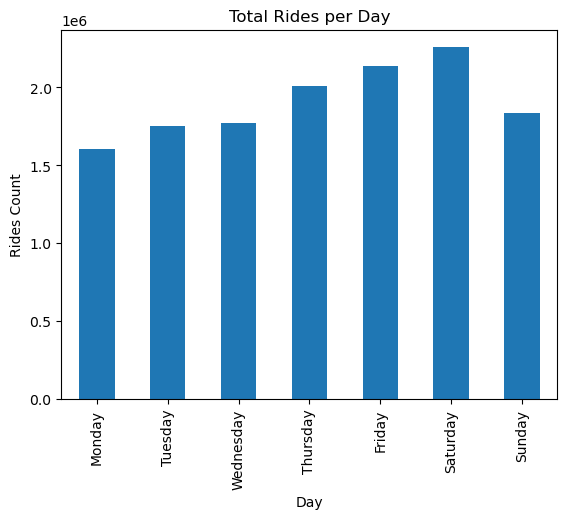

In [586]:
day_name.sort_values("Day_Name").plot(kind="bar", x='Day_Name', y='Num_rides',legend=False,title="Total Rides per Day",xlabel='Day',ylabel='Rides Count')

Plot peak_hour within the day

<Axes: xlabel='Hour'>

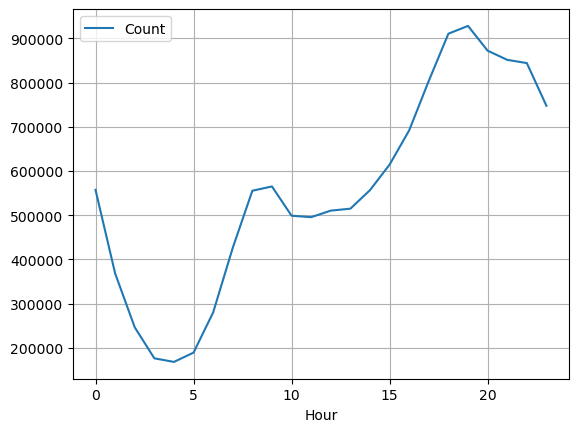

In [588]:
peak_hour.plot(kind='line',x='Hour',y='Count',grid=True,)

Droping unnecessary columns 

In [146]:
uber_df3 = uber_df2.drop(['Pickup_date','Dispatching_base_num'], axis=1)

In [539]:
uber_df3.columns

Index(['locationID', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Day_Name'], dtype='object')

Merge taxi-zone to get the location name

In [151]:
taxi_zone=pd.read_csv('taxi-zone-lookup.csv')

In [153]:
taxi_zone.columns

Index(['LocationID', 'Borough', 'Zone'], dtype='object')

In [155]:
uber_df4=uber_df3.merge(taxi_zone,"left",left_on="locationID",right_on="LocationID")

In [156]:
uber_df4

,locationID,Year,Month,Day,Hour,Minute,Day_Name,LocationID,Borough,Zone
0,141,2015,5,17,9,47,Sunday,141,Manhattan,Lenox Hill West
1,65,2015,5,17,9,47,Sunday,65,Brooklyn,Downtown Brooklyn/MetroTech
2,100,2015,5,17,9,47,Sunday,100,Manhattan,Garment District
3,80,2015,5,17,9,47,Sunday,80,Brooklyn,East Williamsburg
4,90,2015,5,17,9,47,Sunday,90,Manhattan,Flatiron
...,...,...,...,...,...,...,...,...,...,...
13372249,186,2015,5,8,15,43,Friday,186,Manhattan,Penn Station/Madison Sq West
13372250,263,2015,5,8,15,43,Friday,263,Manhattan,Yorkville West
13372251,90,2015,5,8,15,43,Friday,90,Manhattan,Flatiron
13372252,45,2015,5,8,15,44,Friday,45,Manhattan,Chinatown


Dropping locationID column

In [157]:
uber_df5 = uber_df4.drop(['locationID'], axis=1)

Counting drives grouped by Borough

In [439]:
Count_Loc=uber_df5.groupby(by=["Borough"]).LocationID.count().reset_index(name='Count').sort_values(by='Count',ascending=False)

In [441]:
Count_Loc

,Borough,Count
3,Manhattan,9623389
1,Brooklyn,2242234
4,Queens,1275061
0,Bronx,218331
5,Staten Island,6924
6,Unknown,6210
2,EWR,105


Creating a pie chart for the distruibition rides across NYC 

In [473]:
labels=Count_Loc['Borough'].values
labels

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island',
       'Unknown', 'EWR'], dtype=object)

<Axes: ylabel='Count'>

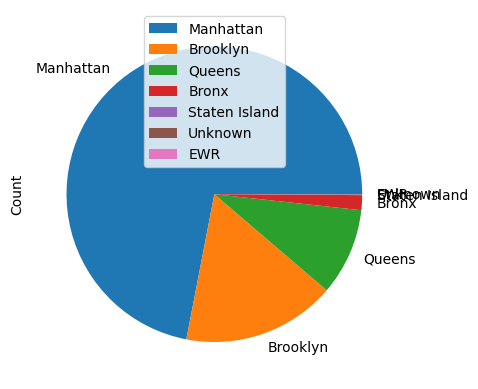

In [486]:
Count_Loc.plot(kind='pie',y='Count',labels=labels)

Creating a bar chart for the top 10 bussiest zones inside Manhatten

In [502]:
manhattan_df =Count_boro[Count_boro['Borough'] == 'Manhattan']

<Axes: xlabel='Zone'>

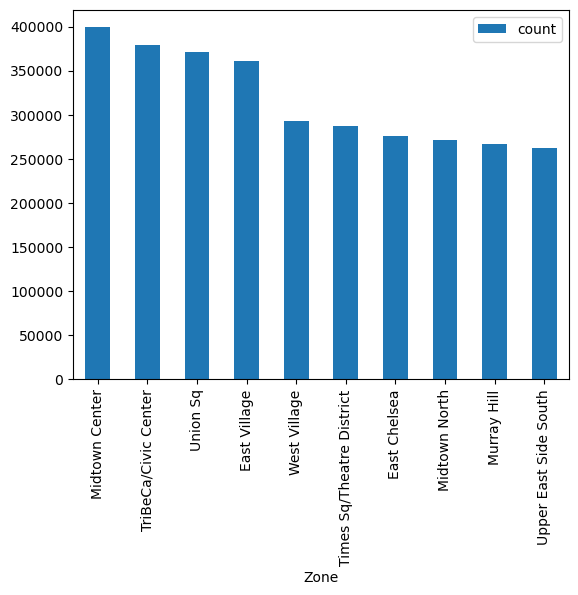

In [506]:
manhattan_df.head(10).plot(kind="bar",x='Zone')